In [1]:
!nvidia-smi

Sat May 27 10:21:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.79                 Driver Version: 531.79       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB   WDDM | 00000000:29:00.0  On |                  N/A |
| 25%   36C    P8                7W / 120W|    806MiB /  6144MiB |     17%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# @title Setup & Config
import os
import subprocess
import platform
from IPython.display import clear_output
import sys
import time


def setup():
    libraries = """torch
        numpy
        pandas
        seaborn
        matplotlib
        scikit-learn
        watermark
        psutil
        IProgress
        sympy
        filelock
        jinja2
        networkx
        typing-extensions
        IProgress
        awscli
        transformers
        """.split()

    with open('requirements.txt', 'w') as f:
        f.write("\n".join(libraries))
    
    if platform.system() == 'Linux':
        commands = [
            # 'sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1',
            # 'echo 2 | sudo update-alternatives --config python3',
            # 'sudo apt install python3-pip',
            'python -m pip install --upgrade pip',
            'pip install -r requirements.txt',
            'python3 --version'
        ]
        for command in commands:
            output = subprocess.check_output(command, shell=True)
            print(output.decode())
            clear_output(wait=True)
    elif platform.system() == 'Windows':
        # Comandos para Windows
        # !conda config --add channels nvidia
        # !conda install --file requirements.txt -y
        # !conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
        !pip install -qq watermark awscli
        !pip install torch==2.0.0+cu118 torchvision==0.15.1+cu118 torchaudio==2.0.1 --index-url https://download.pytorch.org/whl/cu118
        !pip install seaborn matplotlib scikit-learn scikit-learn IProgress
        !pip install transformers
        !pip install numpy pandas seaborn psutil sympy filelock jinja2 networkx typing-extensions awscli
        pass

setup()
print(sys.executable)


Looking in indexes: https://download.pytorch.org/whl/cu118
C:\Users\guill\.conda\envs\nlptfm\python.exe


In [3]:
platform.system()

'Windows'

In [4]:
'''
para evitar que se ponga en off, hacer ctrol + shift + i y luego a consola
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
'''

'\npara evitar que se ponga en off, hacer ctrol + shift + i y luego a consola\nfunction ConnectButton(){\n    console.log("Connect pushed"); \n    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() \n}\nsetInterval(ConnectButton,60000);\n'

In [5]:
!python -m torch.utils.collect_env

PyTorch version: 2.0.0+cu118
Is debug build: False
CUDA used to build PyTorch: 11.8
ROCM used to build PyTorch: N/A

OS: Microsoft Windows 10 Pro
GCC version: Could not collect
Clang version: Could not collect
CMake version: Could not collect
Libc version: N/A

Python version: 3.10.11 | packaged by conda-forge | (main, May 10 2023, 18:51:25) [MSC v.1934 64 bit (AMD64)] (64-bit runtime)
Python platform: Windows-10-10.0.19045-SP0
Is CUDA available: True
CUDA runtime version: 11.8.89

CUDA_MODULE_LOADING set to: LAZY
GPU models and configuration: GPU 0: NVIDIA GeForce GTX 1060 6GB
Nvidia driver version: 531.79
cuDNN version: Could not collect
HIP runtime version: N/A
MIOpen runtime version: N/A
Is XNNPACK available: True

CPU:
Architecture=9


CurrentClockSpeed=3700


DeviceID=CPU0


Family=107


L2CacheSize=2048


L2CacheSpeed=


Manufacturer=AuthenticAMD


MaxClockSpeed=3700


Name=AMD Ryzen 5 1500X Quad-Core Processor          


ProcessorType=3


Revision=257

Versions of relevant lib

In [6]:
import torch
# torch.cuda.device_count()
torch.cuda.is_available()



True

## Setup

We'll need [the Transformers library](https://huggingface.co/transformers/) by Hugging Face:

In [7]:
if platform.system() == 'Linux':
    !which python
    !pip install transformers -qq
else:
    !where python

C:\Users\guill\.conda\envs\nlptfm\python.exe
C:\Users\guill\AppData\Local\Microsoft\WindowsApps\python.exe


In [8]:
!pip show transformers torch

Name: transformers
Version: 4.29.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: c:\users\guill\.conda\envs\nlptfm\lib\site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, tokenizers, tqdm
Required-by: 
---
Name: torch
Version: 2.0.0+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\guill\.conda\envs\nlptfm\lib\site-packages
Requires: filelock, jinja2, networkx, sympy, typing-extensions
Required-by: torchaudio, torchvision


In [9]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

In [10]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F


pd.set_option('display.width', 144)
pd.set_option('display.max_columns', None)

if not os.path.exists('./sample_data'):
    os.makedirs('./sample_data')

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
# seleccionamos la GPU si está disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## CONFIGURACIÓN DE LOS MODELOS PREENTRENADOS BERT

>CONSULTAR LOS MODELOS PREENTRENADOS DISPONIBLES [AQUI](https://huggingface.co/transformers/pretrained_models.html)



In [11]:
def experimento(tipo: str, idioma: str):
    """
    Configura y devuelve los parámetros para un experimento.

    Parámetros
    ----------
    tipo : str
        El tipo de experimento a realizar. Debe ser "AMAZON" o "AGNEWS".
    idioma : str
        El idioma del modelo pre-entrenado a utilizar. Debe ser "EN" o "ES".

    Devoluciones
    -------
    int
        El tamaño del lote a utilizar en el experimento.
    int
        El número de épocas a utilizar en el experimento.
    float
        La tasa de aprendizaje a utilizar en el experimento.
    str
        El nombre del modelo pre-entrenado a utilizar en el experimento.

    """
    
    experiment_params = {
         "AMAZON": (16,2,1e-5),
        # "AMAZON": (16,5,1e-5), # demasiado 5 epochs, casi 6h de entrenamiento. con 2 se consigue casi lo mismo. 
        # "AMAZON":(16, 4, 2e-5),
        # "AMAZON": (16, 2, 5e-5),
        "AGNEWS": (32, 4, 3e-5) 
    }
    
    model_names = {
        "ES": 'dccuchile/bert-base-spanish-wwm-cased', # https://sparknlp.org/2021/09/07/bert_base_cased_es.html
        # "ES": 'bert-base-multilingual-cased',
        "EN": 'google/bert_uncased_L-4_H-256_A-4',
    }
    
    if tipo.upper() not in experiment_params:
        print("elige experimento")
        return
    
    if idioma.upper() not in model_names:
        print("modelo no elegido")
        return
    
    BATCH_SIZE, EPOCHS, LEARNING_RATE = experiment_params[tipo.upper()]
    PRE_TRAINED_MODEL_NAME = model_names[idioma.upper()]
    
    return BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma

BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma = experimento(tipo = "AGNEWS", idioma ="en")

In [12]:
print(f"BATCH_SIZE: {BATCH_SIZE}")
print(f"LEARNING_RATE: {LEARNING_RATE}")
print(f"EPOCHS: {EPOCHS}")
print(f"PRE_TRAINED_MODEL_NAME: {PRE_TRAINED_MODEL_NAME}")
print(f"DATASET: {tipo}")
print(f"Idioma: {idioma}")

BATCH_SIZE: 32
LEARNING_RATE: 3e-05
EPOCHS: 4
PRE_TRAINED_MODEL_NAME: google/bert_uncased_L-4_H-256_A-4


## Exploración de datos

### download data

In [13]:
root_folder = "./sample_data/"

if not os.path.isfile(os.path.join(root_folder,'news_category_train.csv')):
    !wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_train.csv -P ./sample_data -q
if not os.path.isfile(os.path.join(root_folder,'news_category_test.csv')):
    !wget https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp-workshop/master/tutorials/Certification_Trainings/Public/data/news_category_test.csv -P ./sample_data -q

In [14]:
os.listdir(root_folder)

['dataset_es_test.json',
 'dataset_es_train.json',
 'news_category_test.csv',
 'news_category_train.csv']

In [15]:

# Si queremos hacer el split al dataset
'''
(trainingData, testData) = trainDataset.randomSplit([0.7, 0.3], seed = 100)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))
'''

'\n(trainingData, testData) = trainDataset.randomSplit([0.7, 0.3], seed = 100)\nprint("Training Dataset Count: " + str(trainingData.count()))\nprint("Test Dataset Count: " + str(testData.count()))\n'

In [16]:
# naming values
traindata = root_folder + "news_category_train.csv"
testdata = root_folder + "news_category_test.csv"


In [17]:
if platform.system() == 'Linux':
    !head {traindata}
else:
    !powershell -command "gc {traindata} | select -first 10 # head"

category,description
Business," Short sellers, Wall Street's dwindling band of ultra cynics, are seeing green again."
Business," Private investment firm Carlyle Group, which has a reputation for making well timed and occasionally controversial plays in the defense industry, has quietly placed its bets on another part of the market."
Business, Soaring crude prices plus worries about the economy and the outlook for earnings are expected to hang over the stock market next week during the depth of the summer doldrums.
Business," Authorities have halted oil export flows from the main pipeline in southern Iraq after intelligence showed a rebel militia could strike infrastructure, an oil official said on Saturday."
Business," Tearaway world oil prices, toppling records and straining wallets, present a new economic menace barely three months before the US presidential elections."
Business," Stocks ended slightly higher on Friday but stayed near lows for the year as oil prices surged past  #36;

In [18]:
# from google.colab import data_table
import json
df = pd.read_csv(traindata, sep=",", engine="c", on_bad_lines='skip').rename(
    columns={"review_body": "description"})
df_testdata = pd.read_csv(testdata, sep=",", engine="c", on_bad_lines='skip').rename(
    columns={"review_body": "description"})
print("Tamaño total ", df.shape)


df[:10]

Tamaño total  (119998, 2)


,category,description
0,Business,"Short sellers, Wall Street's dwindling band o..."
1,Business,"Private investment firm Carlyle Group, which ..."
2,Business,Soaring crude prices plus worries about the e...
3,Business,Authorities have halted oil export flows from...
4,Business,"Tearaway world oil prices, toppling records a..."
5,Business,Stocks ended slightly higher on Friday but st...
6,Business,Assets of the nation's retail money market mu...
7,Business,"Retail sales bounced back a bit in July, and ..."
8,Business,"After earning a PH.D. in Sociology, Danny Baz..."
9,Business,"Short sellers, Wall Street's dwindling band ..."


# Describiendo las categorias:
A diferencia del Amazon Reviews, AG News la columna "categoria" está presente en `df` y `df_testdata`. La columna "categoria" contiene la clasificacion (pre etiquetado) de las noticias que nos servirá para entrenar y probar nuestro modelo.

`['Business', 'Sci/Tech', 'Sports', 'World']`

Sin embargo, tenemos que codificar las etiquetas de categoria para el modelo BERT utlizando `LabelEncoder` de **sklearn**

In [19]:
df_testdata[:5]

,category,description
0,Business,Unions representing workers at Turner Newall...
1,Sci/Tech,"TORONTO, Canada A second team of rocketeer..."
2,Sci/Tech,A company founded by a chemistry researcher a...
3,Sci/Tech,It's barely dawn when Mike Fitzpatrick starts...
4,Sci/Tech,Southern California's smog fighting agency we...


In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["category_encoded"] = le.fit_transform(df.category)
df_testdata["category_encoded"] = le.fit_transform(df_testdata.category)

In [21]:
le.classes_

array(['Business', 'Sci/Tech', 'Sports', 'World'], dtype=object)

In [22]:
df.category.value_counts()

category
Sports      30000
World       30000
Business    29999
Sci/Tech    29999
Name: count, dtype: int64

In [23]:
df_testdata.category.value_counts()

category
Business    1900
Sci/Tech    1900
Sports      1900
World       1900
Name: count, dtype: int64

In [24]:
# igualamos el numero de ocurrencias por categoria para no tener bias.
df_temp = pd.concat([
    df.query("category=='Business'")[:29999],
    df.query("category=='Sci/Tech'")[:29999],
    df.query("category=='Sports'")[:29999],
    df.query("category=='World'")[:29999]
], ignore_index=True)
df = df_temp

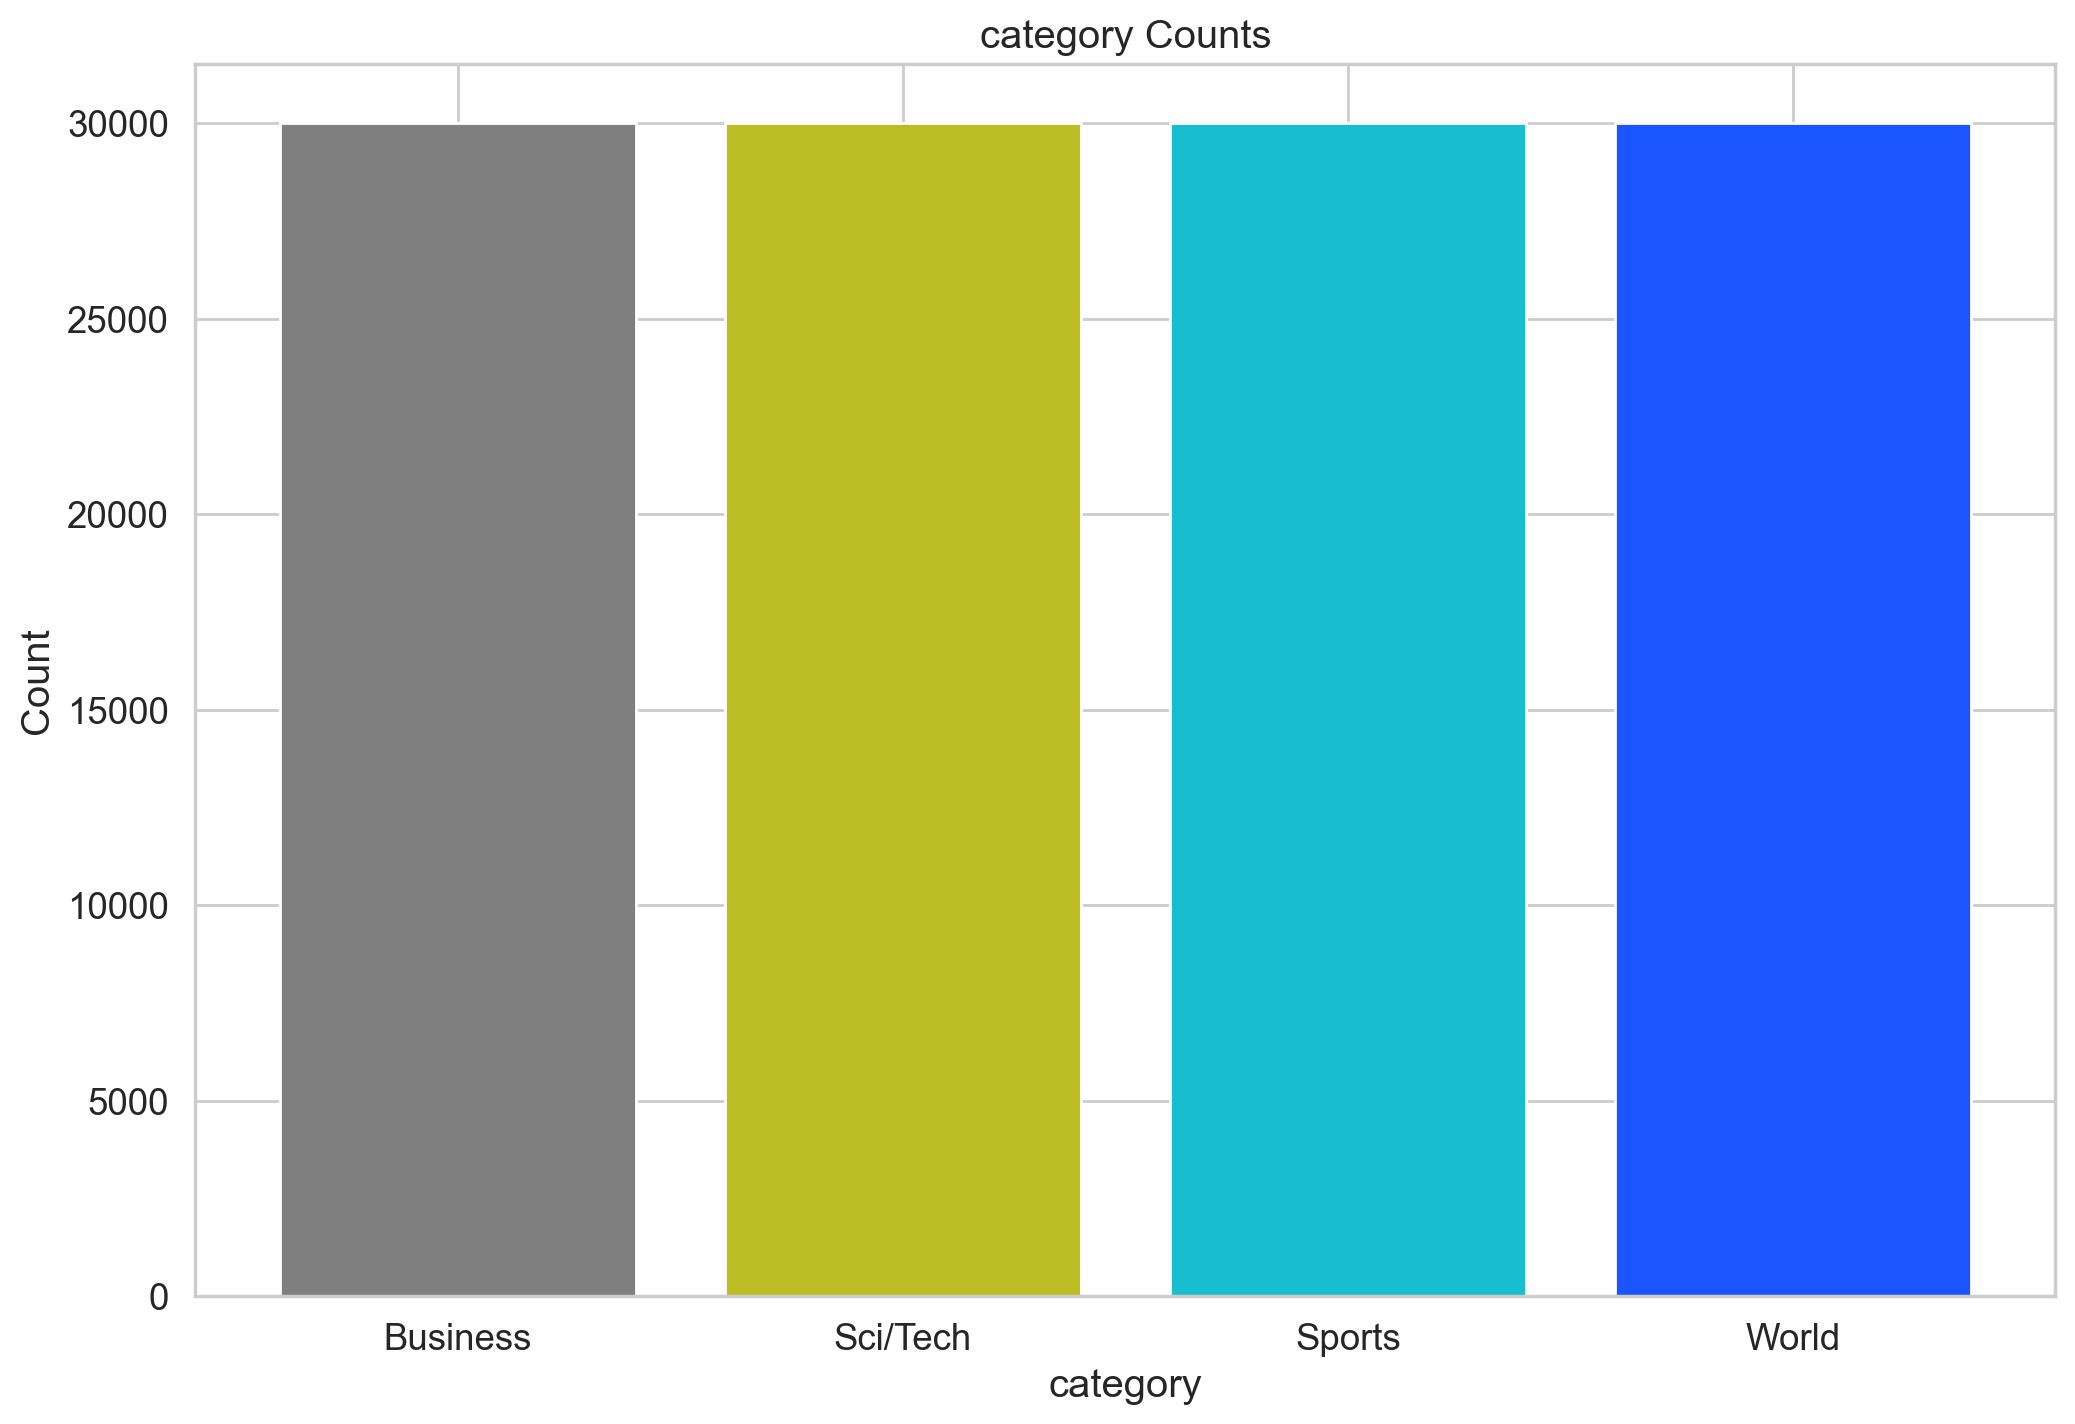

In [25]:
import matplotlib.pyplot as plt
colors = [
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#1a55FF",
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
]
# df.category.value_counts().where(lambda x: x > 1000).dropna().plot.bar(color=colors)
category_counts = df.groupby(["category"]).count()[["description"]].reset_index()

plt.bar(category_counts.category,category_counts.description, color = colors)
plt.xlabel("category")
plt.ylabel("Count")
plt.title("category Counts")
plt.show()

# creamos tokenizador bert

In [26]:
# creamos tokenizador bert
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [27]:
# frase ejemplo 
sample_txt = 'This time we are tokenizing an english sentence, as you can see its the same as in the spanish one.'
# ejemplo tokenización manual (separando x listas )
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: This time we are tokenizing an english sentence, as you can see its the same as in the spanish one.
   Tokens: ['this', 'time', 'we', 'are', 'token', '##izing', 'an', 'english', 'sentence', ',', 'as', 'you', 'can', 'see', 'its', 'the', 'same', 'as', 'in', 'the', 'spanish', 'one', '.']
Token IDs: [2023, 2051, 2057, 2024, 19204, 6026, 2019, 2394, 6251, 1010, 2004, 2017, 2064, 2156, 2049, 1996, 2168, 2004, 1999, 1996, 3009, 2028, 1012]


In [28]:
# Mismo ejemplo pero preparandolo para Pytorch (tensors) con encode_plus

sample_txt = r"'The medic NPCs from half life 2 can heal you up to 20% of your health bar every 90 seconds.'"


encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Añadir '[CLS]' & '[SEP]'
  return_token_type_ids=False,
  padding='max_length',
  return_attention_mask=True,
  return_tensors='pt',  # Devolver PyTorch tensors
)

encoding.keys()


dict_keys(['input_ids', 'attention_mask'])

In [29]:
# para ver los tokens (convertirlo a algo legible)
print(f"--->longitud tokens: {len(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]) )}")
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]) 

--->longitud tokens: 32


['[CLS]',
 "'",
 'the',
 'med',
 '##ic',
 'np',
 '##cs',
 'from',
 'half',
 'life',
 '2',
 'can',
 'heal',
 'you',
 'up',
 'to',
 '20',
 '%',
 'of',
 'your',
 'health',
 'bar',
 'every',
 '90',
 'seconds',
 '.',
 "'",
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

### Eligiendo la longitud de la secuencia (Sequence Length)

BERT funciona bien con secuencias de igual tamaño (longitud). Se usa una estrategia simple para elegir la longitud maxima. 

Veamos la longitud de los tokens para cada review

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\guill\AppData\Local\Temp\ipykernel_23752\192746740.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(token_lens)


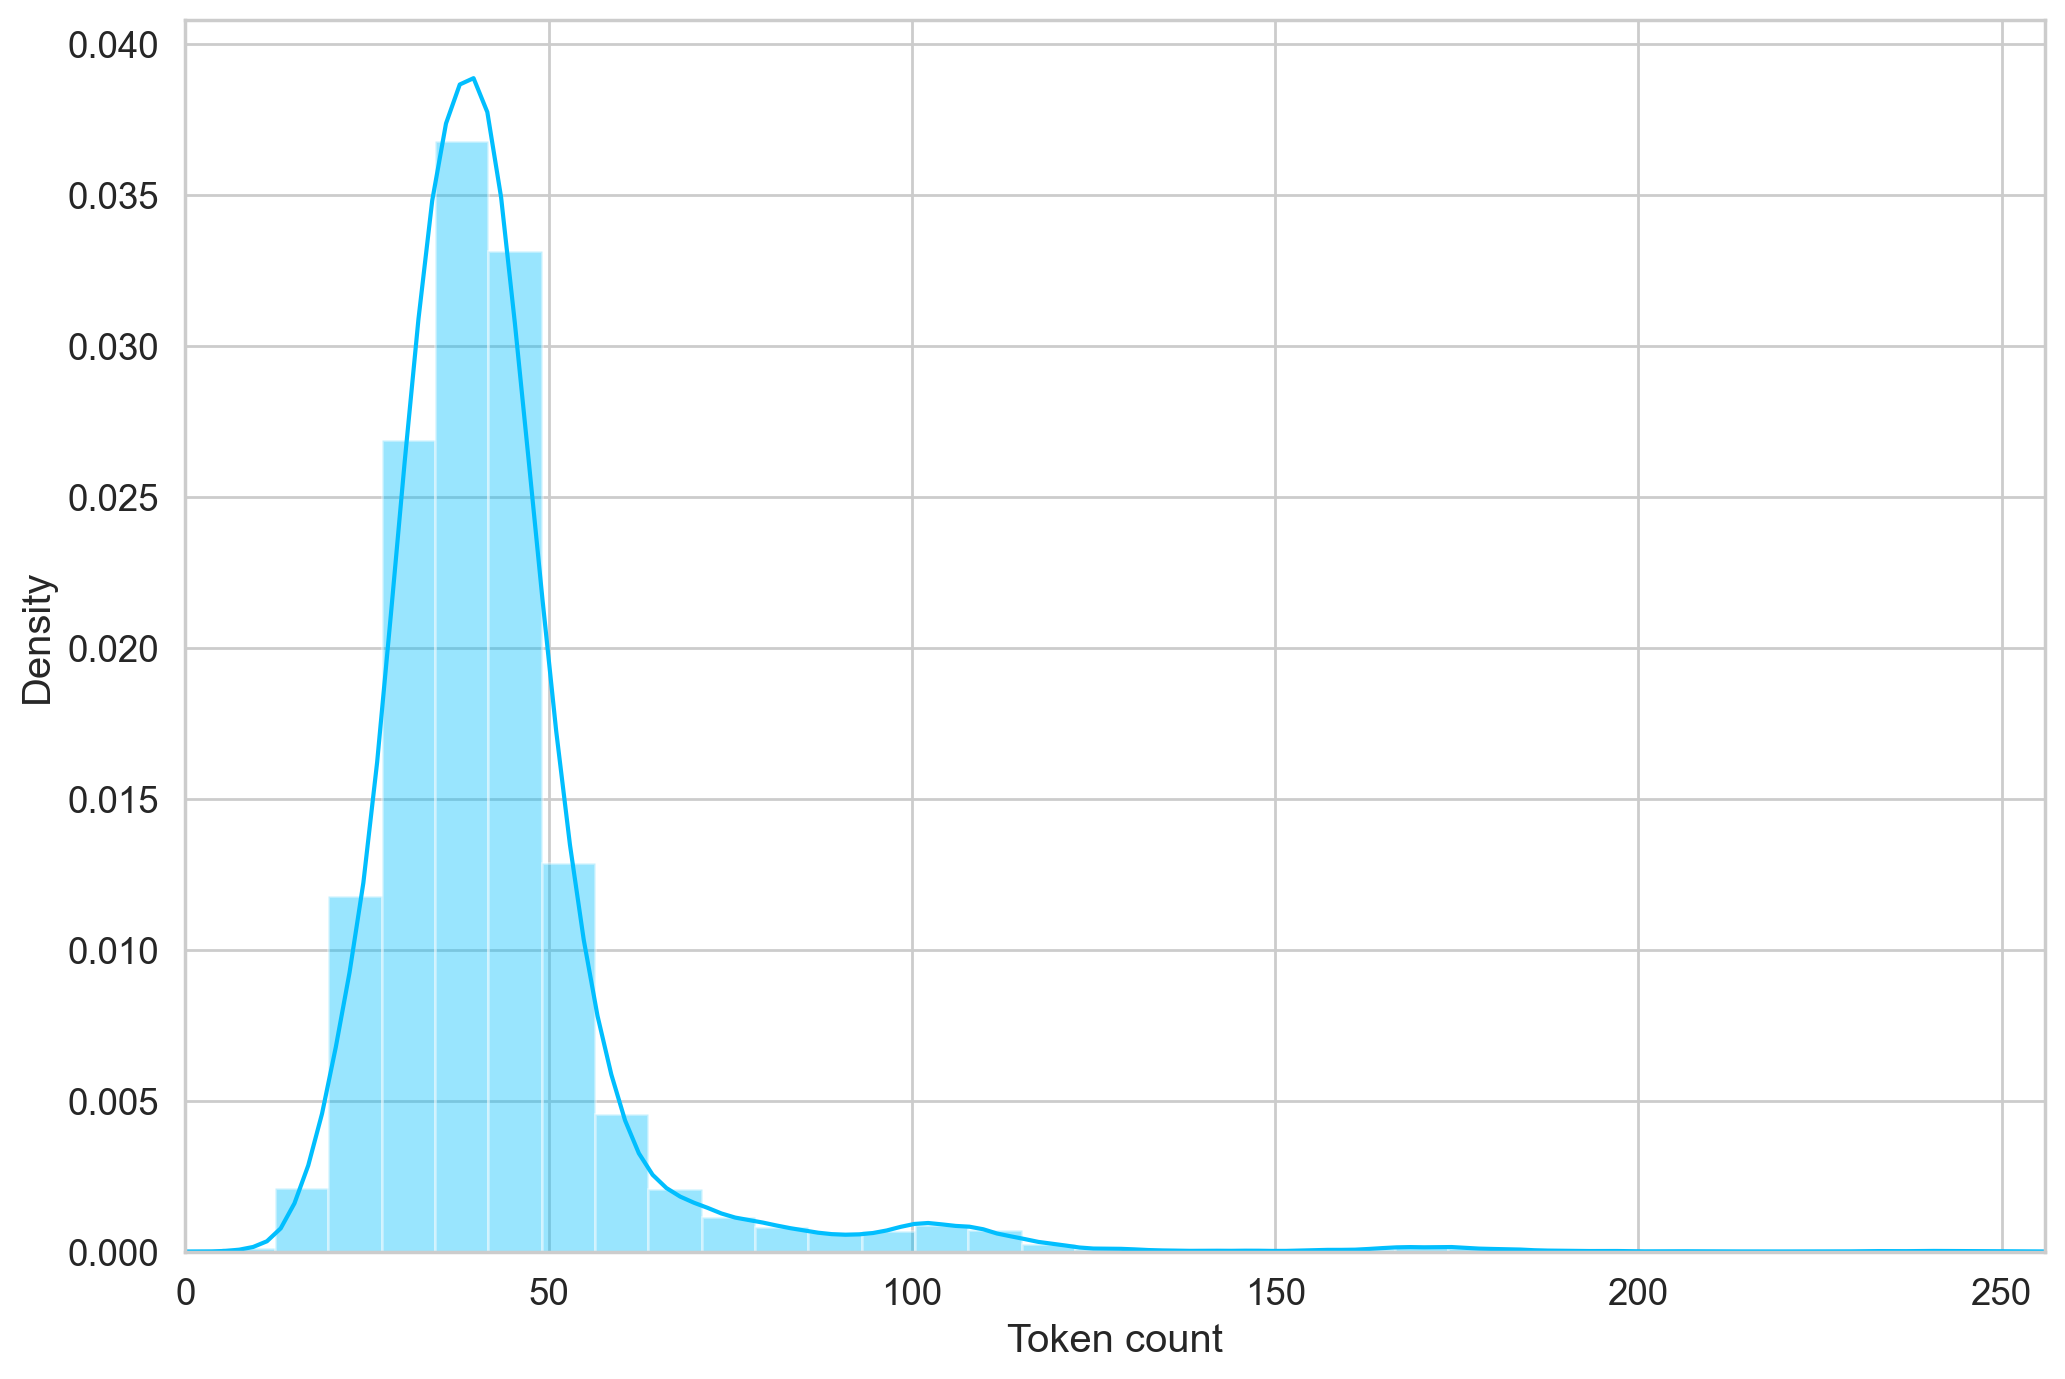

In [30]:
token_lens = []

for txt in df.description:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))
# lo visualizamos para hacernos una idea
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

# vemos a ojo el numero de tokens.
# y asignamos un valor

In [31]:
# valor para el numero de tokens por lote (ALGO RAZONABLE 160)
MAX_LEN = 80

# Construir el dataset y dataloader

In [32]:
# construimos dataloader
class MyDatasetBuilder(Dataset):
    """
    Un conjunto de datos personalizado para cargar y tokenizar datos de revisión.

    Atributos
    ----------
    reviews : numpy.ndarray
        El texto a clasificar.
    targets : numpy.ndarray
        El topic/sentiment/objetivo.
    tokenizer : transformers.PreTrainedTokenizer
        El objeto tokenizer de Huggingface o transformación aplicada a los datos.
    max_len : int
        Número de tokens por frase.

    Métodos
    -------
    __len__(self):
        Devuelve la longitud del conjunto de datos.
    __getitem__(self, item):
        Devuelve un elemento del conjunto de datos.

    """
    
    def __init__(self, text_toclasify, targets, tokenizer, max_len):
        """
        Inicializa el conjunto de datos con los datos y el tokenizador.

        Parámetros
        ----------
        text_toclasify : numpy.ndarray
            El texto a clasificar.
        targets : numpy.ndarray
            El topic/sentiment/objetivo.
        tokenizer : transformers.PreTrainedTokenizer
            El objeto tokenizer de Huggingface o transformación aplicada a los datos.
        max_len : int
            Número de tokens por frase.

        """
        self.reviews = text_toclasify # el texto a clasificar
        self.targets = targets # el topic/sentiment/objetivo.
        self.tokenizer = tokenizer # el objeto tokenizer de Huggingface o transformación aplicada a los datos
        self.max_len = max_len # número de tokens por frase

    def __len__(self):
        """
        Devuelve la longitud del conjunto de datos.

        Devoluciones
        -------
        int
            La longitud del conjunto de datos.

        """
        return len(self.reviews)

    def __getitem__(self, item):
        """
        Devuelve un elemento del conjunto de datos.

        Parámetros
        ----------
        item : int
            El índice del elemento a devolver.

        Devoluciones
        -------
        dict
            Un diccionario que contiene el texto de revisión, los identificadores de entrada,
            la máscara de atención y las etiquetas objetivo.

        """
        
        review = str(self.reviews[item])
        target = self.targets[item]
        
        # Configuración del tokenizador.        
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            truncation=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
         )
        
        # Devolvemos un diccionario con los input codificados.         
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }


## Train-test split

In [33]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)
# aqui añado los datos csv del segundo dataset `testdata`
df_val, df_test2 = train_test_split(df_testdata, test_size=0.5, random_state=RANDOM_SEED)

In [34]:
# df_train.shape, df_val.shape, df_test.shape

print("Training Dataset shape: " + str(df_train.shape))
print("Evaluation Dataset shape: " + str(df_val.shape))
print("Test Dataset shape: " + str(df_test.shape))

Training Dataset shape: (107996, 3)
Evaluation Dataset shape: (3800, 3)
Test Dataset shape: (12000, 3)


In [35]:
def create_data_loader(df, col_text, col_targets, tokenizer, max_len, batch_size):
    """
    Crea un cargador de datos a partir de un DataFrame.

    Parámetros
    ----------
    df : pandas.DataFrame
        El DataFrame que contiene los datos.
    col_text : str
        El nombre de la columna que contiene el texto a clasificar.
    col_targets : str
        El nombre de la columna que contiene las etiquetas objetivo.
    tokenizer : transformers.PreTrainedTokenizer
        El tokenizador a utilizar para tokenizar el texto.
    max_len : int
        La longitud máxima de las secuencias tokenizadas.
    batch_size : int
        El tamaño del lote a utilizar al cargar los datos.

    Output
    -------
    torch.utils.data.DataLoader
        Un cargador de datos que proporciona lotes de datos para entrenamiento o evaluación.

    """
    ds = MyDatasetBuilder(
        text_toclasify=df[col_text].to_numpy(),
        targets=df[col_targets].to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        # Antes el número de workers era num_workers=4, pero para optimizar mejor el rendimiento el sistema pide 2
        # en linux usar tantos como cores tenga. En windows mejor no utilizar y config a cero. 
        # en todo caso. Utilizar la GPU siempre que se pueda.
        num_workers=0,
        pin_memory=True
    )


In [36]:
df.columns

Index(['category', 'description', 'category_encoded'], dtype='object')

### Incorporando datos al dataloader

In [37]:
### HAY QUE HACER ONE HOT ENCODING PARA PODER METERLO EN EL BERT

In [38]:
train_data_loader = create_data_loader(df_train, "description","category_encoded", tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val,"description","category_encoded",tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test,   "description","category_encoded",tokenizer, MAX_LEN, BATCH_SIZE)

In [39]:
# vemos la estructura de un batch para el training
data = next(iter(create_data_loader(df_train[:50], "description","category_encoded", tokenizer, MAX_LEN, BATCH_SIZE)))
print("keys train dataset",data.keys())
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

keys train dataset dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([32, 80])
torch.Size([32, 80])
torch.Size([32])


In [40]:
data = next(iter(val_data_loader))
print("keys evaluation dataset",data.keys())
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

keys evaluation dataset dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])
torch.Size([32, 80])
torch.Size([32, 80])
torch.Size([32])


In [41]:
# cargamos el modelo BERT
#creamos un clasificador BERT para realizar clasificaciones
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__() # hereda propiedades y methods de otras clases. llama al init de otra clase.
    # Cuando creamos nuestro modelo, podemos elegir el modelo base o pillar BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3) # dropout layer
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      # es necesario añadirlo despues del cambio de la v3 a la v4
      return_dict=False 
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [42]:
class_names=le.classes_
# print(f"Numero de cagetorias: {len(class_names)}")
print(f"Numero de cagetorias: {len(le.classes_)}")

Numero de cagetorias: 4


## asignamos el modelo

In [43]:
# asignamos el modelo a un objeto, le pasamos como argumento el countdistinct de todas las etiquetas que tenemos.
# y lo movemos a la memoria de la GPU

model = SentimentClassifier(len(le.classes_))
model = model.to(device)

C:\Users\guill\.conda\envs\nlptfm\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\guill\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at google/bert_uncased_L-4_H-256_A-4 were not used when initializing BertModel: ['cls.predictions.trans

### Training

Para reproducir el procedimiento de entrenamiento del **documento BERT**  usaremos el optimizador [AdamW](https://huggingface.co/transformers/main_classes/optimizer_schedules.html#adamw) de Hugging Face. Corregirá el reparto/decadencia de pesos (weight decay), para que sea similar al documento original.  Tambien usaremos un planificador lineal (para la curva de aprendizaje) sin steps de calentamiento (warmup steps). 

In [44]:
# EPOCHS = 4 # 10
# LEARNING_RATE = 2e-5
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
# la funcion de perdida en este caso es entropia cruzada, que combina LogSoftMax y NLLLoss en una sola clase. Muy utilizada en ML y concretamente en clasificación multietiqueta. 
loss_fn = nn.CrossEntropyLoss().to(device)

C:\Users\guill\.conda\envs\nlptfm\lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


¿Cómo llegamos a la conclusion de usar este numero de hiperparámetros? Los autores de BERT tienen algunas recomendaciones para el ajuste fino: 

- Batch size: 16, 32
- Learning rate (Adam): 5e-5, 3e-5, 2e-5
- Number of epochs: 2, 3, 4

Vamos a ignorar la recomendación del numero de "vueltas" *epochs* pero nos quedamos con el resto. A tener en cuenta, que al aumentar el tamaño del lote (batch size) se reduce significativamente el tiempo de entrenamiento a costas de una menor precision (lower accuracy).

Escribimos una funcion auxiliar que nos ayude a entrenar nuestro modelo solo una vuelta.

In [45]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    """
    Entrena el modelo para una época.

    Parámetros
    ----------
    model : torch.nn.Module
        El modelo a entrenar.
    data_loader : torch.utils.data.DataLoader
        El cargador de datos que proporciona lotes de datos de entrenamiento.
    loss_fn : callable
        La función de pérdida a utilizar.
    optimizer : torch.optim.Optimizer
        El optimizador a utilizar para actualizar los parámetros del modelo.
    device : torch.device
        El dispositivo al que mover los datos (por ejemplo, 'cuda' o 'cpu').
    scheduler : torch.optim.lr_scheduler._LRScheduler
        El programador de tasa de aprendizaje a utilizar.
    n_examples : int
        El número de ejemplos en el conjunto de datos.

    Output
    -------
    float
        La precisión del modelo en los datos de entrenamiento.
    float
        La pérdida promedio del modelo en los datos de entrenamiento.

    """
    model = model.train()

    losses = []
    correct_predictions = 0
    # Aquí el Scheduler se llama cada vez que se alimenta otro lote (d) al modelo.
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)
        # Salidas del modelo 
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        _, preds = torch.max(outputs, dim=1)
        
        loss = loss_fn(outputs, targets)

        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        loss.backward()
        # Con clip_grad_norm normalizamos los parámetros del modelo evitando Gradient exploding
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)


# Evaluar el modelo
funcion para evaluar el modelo y luego crear loop

In [46]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  """
  Evaluate the performance of a PyTorch model on a given dataset.

  Parameters
  ----------
  model : torch.nn.Module
      The PyTorch model to evaluate.
  data_loader : torch.utils.data.DataLoader
      The data loader for the dataset to evaluate on.
  loss_fn : callable
      The loss function to use for evaluation.
  device : torch.device
      The device (CPU or GPU) to use for evaluation.
  n_examples : int
      The total number of examples in the dataset.

  Returns
  -------
  accuracy : float
      The accuracy of the model on the dataset.
  loss : float
      The average loss of the model on the dataset.
  """
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

### loop de entrenamiento

In [47]:
%%time

inicio = time.time()

history = defaultdict(list)# creamos un diccionario de listas vacio, para añadir las vueltas
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  # almacenamos el mejor estado del modelo 
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc
    
fin =  time.time() - inicio 

Epoch 1/4
----------
Train loss 0.31787183158706733 accuracy 0.890570021111893
Val   loss 0.26893890598992337 accuracy 0.9028947368421052
Epoch 2/4
----------
Train loss 0.23343620666971912 accuracy 0.9206637282862328
Val   loss 0.2596736442329002 accuracy 0.9121052631578948
Epoch 3/4
----------
Train loss 0.20009349477594648 accuracy 0.9331919700729656
Val   loss 0.2609626799665329 accuracy 0.9144736842105263
Epoch 4/4
----------
Train loss 0.18035633258935477 accuracy 0.9403959405903922
Val   loss 0.2674182500658917 accuracy 0.9126315789473683
CPU times: total: 19min 39s
Wall time: 19min 40s


In [48]:
if not os.path.exists('./modelos'):
    os.makedirs('./modelos')

In [49]:
# si el modelo es de nuestro agrado podemos guardarlo en drive
import datetime
import shutil


def guardar_modelo(tipo, idioma,modelo='best_model_state.bin', ruta_guardado='../resultados/modelos/'):
    """
    Guarda el modelo en la ruta especificada.

    Args:
        modelo: modelo a guardar.
        ruta_guardado: ruta donde se guardará el modelo.
    """
    # Crear la carpeta si no existe
    carpeta_guardado = os.path.dirname(ruta_guardado)
    if not os.path.exists(carpeta_guardado):
        os.makedirs(carpeta_guardado)

    # Generar el nombre del archivo con la fecha y hora actual
    fecha_actual = datetime.datetime.now().strftime(r"%Y-%m-%d_%H-%M-%S")
    nombre_archivo = f"{fecha_actual}_{tipo}_bert_model_state_{idioma}.bin"

    
    # Unir la ruta de la carpeta con el nombre del archivo
    ruta_archivo = os.path.join(ruta_guardado, nombre_archivo)
    shutil.move(modelo, ruta_archivo)
    print(f"modelo {modelo}\n guardado en {ruta_archivo}")

def guardar_metadata(BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma, train_acc:torch.tensor, val_acc:torch.tensor, fin):
    # donde se guardan por defecto
    ruta_guardado = '../resultados/notas/'
    ruta_guardado = os.path.dirname(ruta_guardado)    
    
    if not os.path.exists(ruta_guardado):
        os.makedirs(ruta_guardado)
    metadata = {
        "BATCH_SIZE": [BATCH_SIZE],
        "EPOCHS": [EPOCHS],
        "LEARNING_RATE": [LEARNING_RATE],
        "PRE_TRAINED_MODEL_NAME": [PRE_TRAINED_MODEL_NAME],
        "tipo": [tipo],
        "idioma": [idioma],
        "train_acc": [train_acc.item()],
        "val_acc": [val_acc.item()],
        "tiempo_seg":[fin],
    }
    df = pd.DataFrame(metadata)
    fecha_actual = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    nombre_archivo = f"{fecha_actual}_metadata.csv"
    ruta_archivo = os.path.join(ruta_guardado, nombre_archivo)
    df.to_csv(ruta_archivo, index=False)
    print(f"csv {nombre_archivo}\n guardado en {ruta_archivo}")


guardar_modelo(tipo, idioma)
guardar_metadata(BATCH_SIZE, EPOCHS, LEARNING_RATE, PRE_TRAINED_MODEL_NAME, tipo, idioma, train_acc, val_acc, fin)  


modelo best_model_state.bin
 guardado en ../resultados/modelos/2023-05-27_10-45-07_bert_model_state_amazon_reviews_es.bin
csv 2023-05-27_10-45-07_metadata.csv
 guardado en 2023-05-27_10-45-07_metadata.csv


Ahora podemos ver el historial de entrenamiento Vs la precisión de la validación.

In [50]:
history

defaultdict(list,
            {'train_acc': [tensor(0.8906, device='cuda:0', dtype=torch.float64),
              tensor(0.9207, device='cuda:0', dtype=torch.float64),
              tensor(0.9332, device='cuda:0', dtype=torch.float64),
              tensor(0.9404, device='cuda:0', dtype=torch.float64)],
             'train_loss': [0.31787183158706733,
              0.23343620666971912,
              0.20009349477594648,
              0.18035633258935477],
             'val_acc': [tensor(0.9029, device='cuda:0', dtype=torch.float64),
              tensor(0.9121, device='cuda:0', dtype=torch.float64),
              tensor(0.9145, device='cuda:0', dtype=torch.float64),
              tensor(0.9126, device='cuda:0', dtype=torch.float64)],
             'val_loss': [0.26893890598992337,
              0.2596736442329002,
              0.2609626799665329,
              0.2674182500658917]})

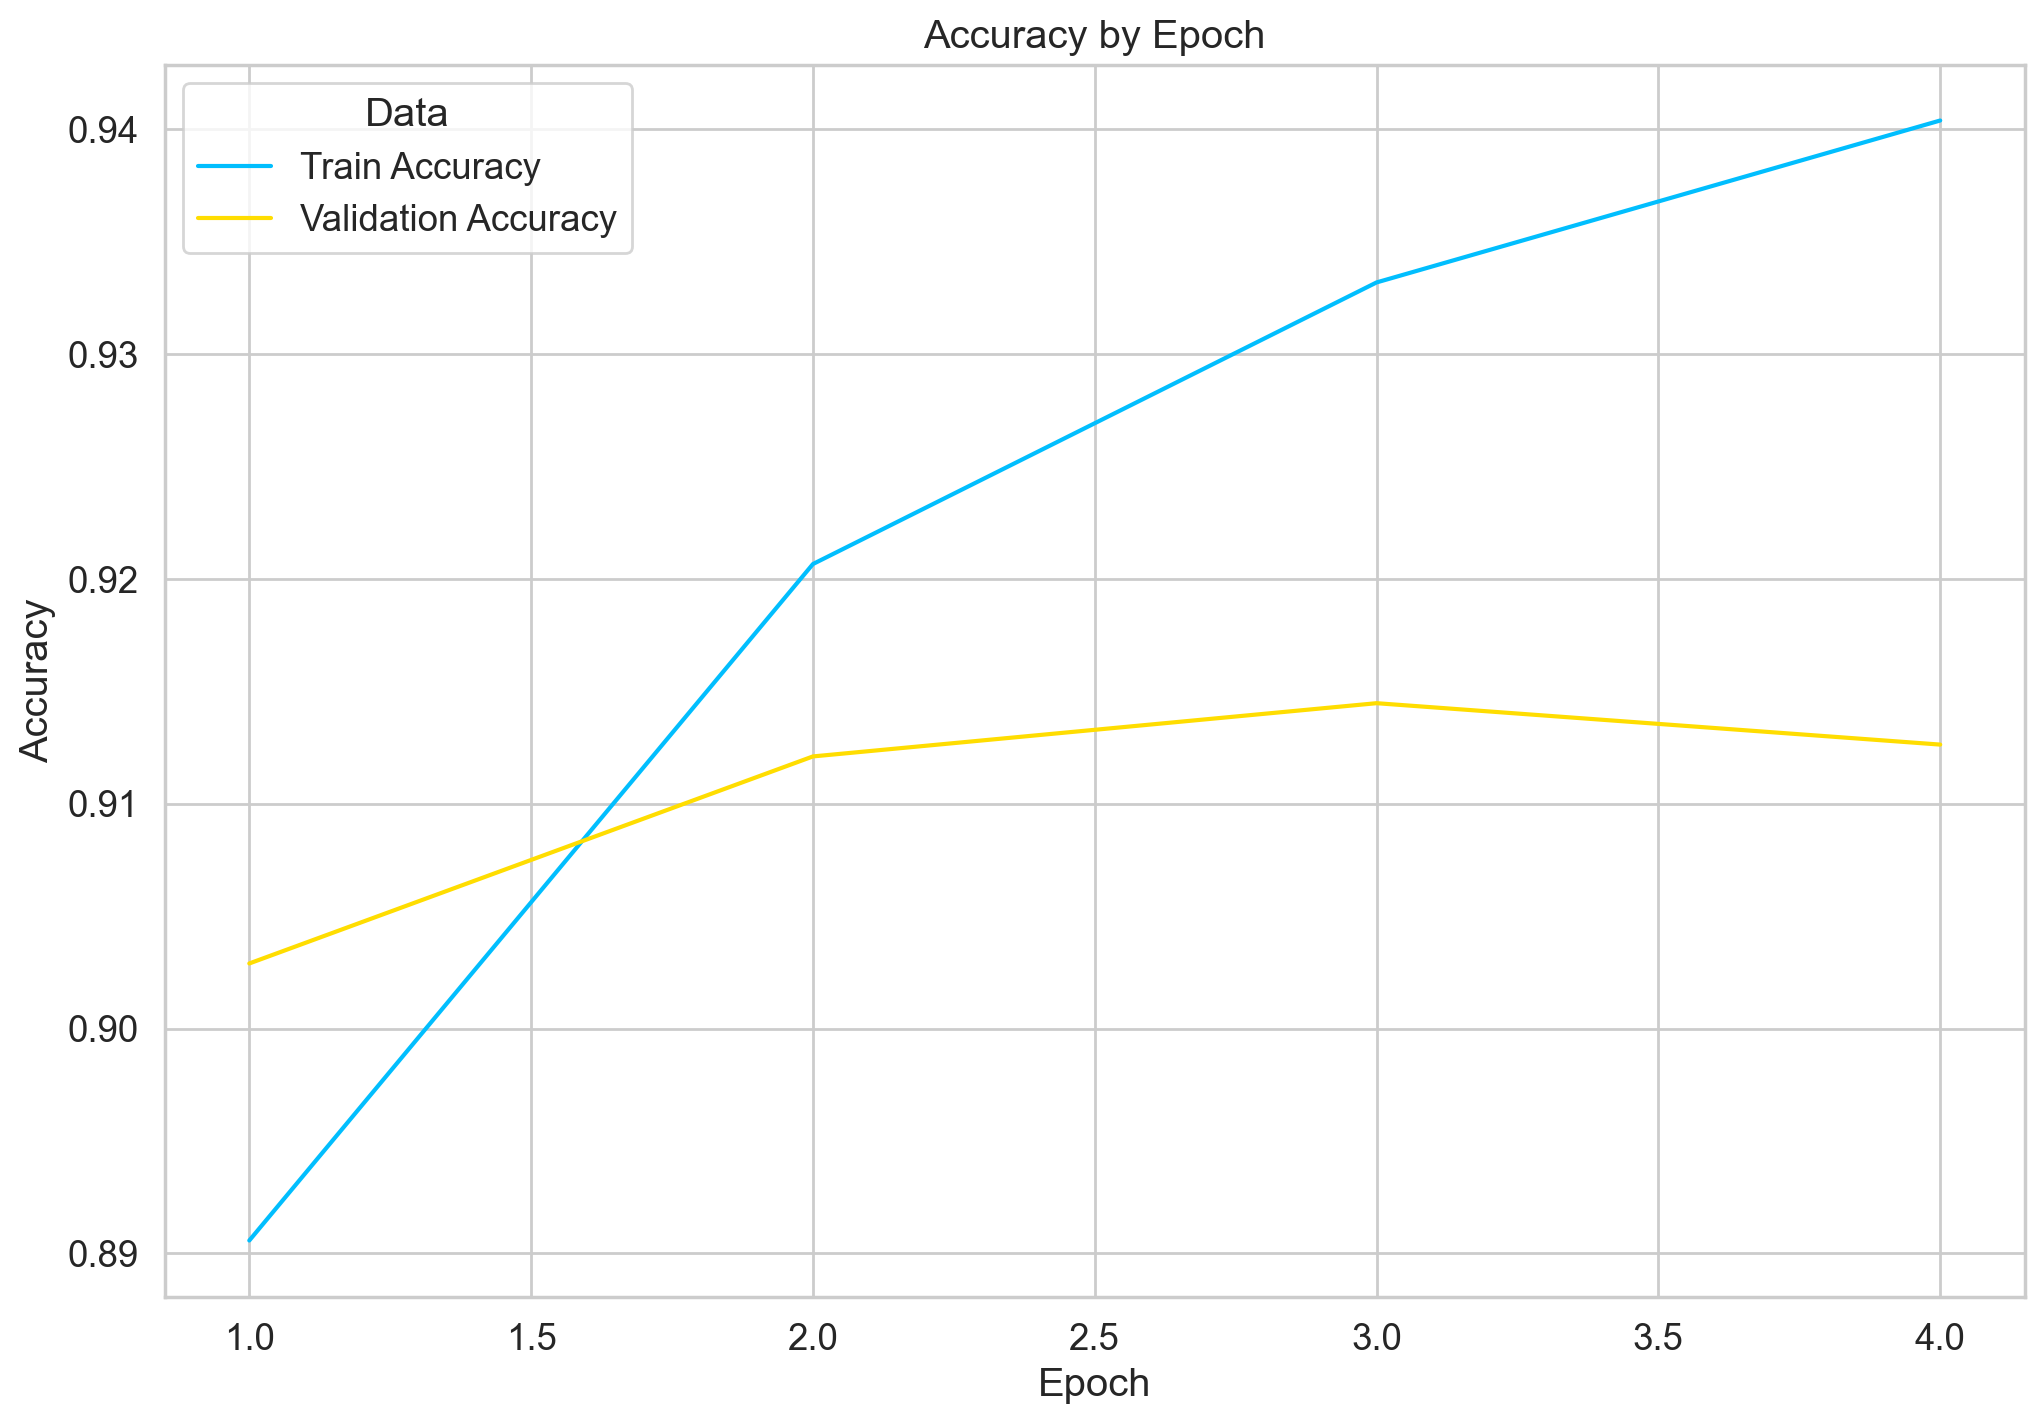

In [51]:
# plt.plot(history['train_acc'], label='train accuracy') # precisión de entrenamiento
# plt.plot(history['val_acc'], label='validation accuracy') # precisión de validación.

# plt.title('Historial de entrenamiento')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.ylim([0, 1]);

# Convertir los tensores de precisión a listas de Python
train_acc = [x.item() for x in history['train_acc']]
val_acc = [x.item() for x in history['val_acc']]

# Crear un DataFrame con la precisión de entrenamiento y validación por época
df = pd.DataFrame({'Epoch': range(1, len(train_acc) + 1), 'Train Accuracy': train_acc, 'Validation Accuracy': val_acc})

# Utilizar el método melt para reorganizar el DataFrame para la visualización
df_melted = pd.melt(df, id_vars=['Epoch'], value_vars=['Train Accuracy', 'Validation Accuracy'], var_name='Data', value_name='Accuracy')

# aplicar gráfico
sns.lineplot(data=df_melted, x='Epoch', y='Accuracy', hue='Data')
plt.title('Accuracy by Epoch')
plt.show()


## Evaluacion
Como sabemos que nuestro modelo está prediciendo bien? Se empieza calculando la precisión en nuestro set de prueba.

In [52]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9208333333333333

La precisión es casi un 1% mas baja que en la de validación. Nuestro modelo parece generalizar bien.

Este modelo con tan solo 40MB de peso y 4 epochs nos ha permitido alcanzar casi un 90% de accuracy en menos de 15 min utilizando GPU.

Ahora definimos una función para ayudarnos a tomar predicciones de nuestro modelo:


La función siguiente `get_predictions` toma un modelo y un cargador de datos como argumentos y devuelve las predicciones del modelo, las probabilidades de predicción y los valores reales para los datos en el cargador de datos.

La función comienza poniendo el modelo en modo de evaluación con `model.eval()`. Luego, inicializa cuatro listas vacías para almacenar los textos de revisión, las predicciones, las probabilidades de predicción y los valores reales.

La función itera sobre los lotes de datos en el cargador de datos utilizando un bucle `for`. Para cada lote, extrae el texto de revisión, los identificadores de entrada, la máscara de atención y las etiquetas objetivo del lote y los mueve al dispositivo especificado.

Luego, la función pasa los identificadores de entrada y la máscara de atención al modelo para obtener las salidas del modelo. Utiliza `torch.max` para obtener las predicciones del modelo y `F.softmax` para obtener las probabilidades de predicción.

La función agrega el texto de revisión, las predicciones, las probabilidades de predicción y las etiquetas objetivo a las listas correspondientes. Después de iterar sobre todos los lotes en el cargador de datos, la función apila las listas de predicciones, probabilidades de predicción y valores reales utilizando `torch.stack` y las mueve a la CPU.

Finalmente, la función devuelve las cuatro listas: `review_texts`, `predictions`, `prediction_probs` y `real_values`.

In [53]:
def get_predictions(model, data_loader):
  """
    Función para obtener predicciones de un modelo PyTorch.

    Parameters
    ----------
    model : torch.nn.Module
        Modelo de PyTorch ya entrenado.
    data_loader : torch.utils.data.DataLoader
        DataLoader de PyTorch que contiene los datos de entrada.

    Returns
    -------
    tuple
        Una tupla que contiene las siguientes listas:
        - review_texts: Lista de cadenas de texto que representan las reseñas.
        - predictions: Lista de predicciones para cada reseña.
        - prediction_probs: Lista de probabilidades de predicción para cada reseña.
        - real_values: Lista de valores reales para cada reseña.
  """

  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["review_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

Esto es similar a la función de evaluación, excepto que almacenamos el texto de las Noticias y las predicciones. (aplicando la función softmax en la salida del modelo):


In [54]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

Veeamos el informe de la clasificación.

In [55]:
print(classification_report(y_test, y_pred, target_names=class_names))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    Business       0.89      0.89      0.89      3062
    Sci/Tech       0.90      0.89      0.89      2993
      Sports       0.97      0.98      0.98      3006
       World       0.93      0.92      0.92      2939

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000

0.9208333333333333


VER SI ESTA EVALUANDO CORRECTAMENTE.

La matriz de confusión:

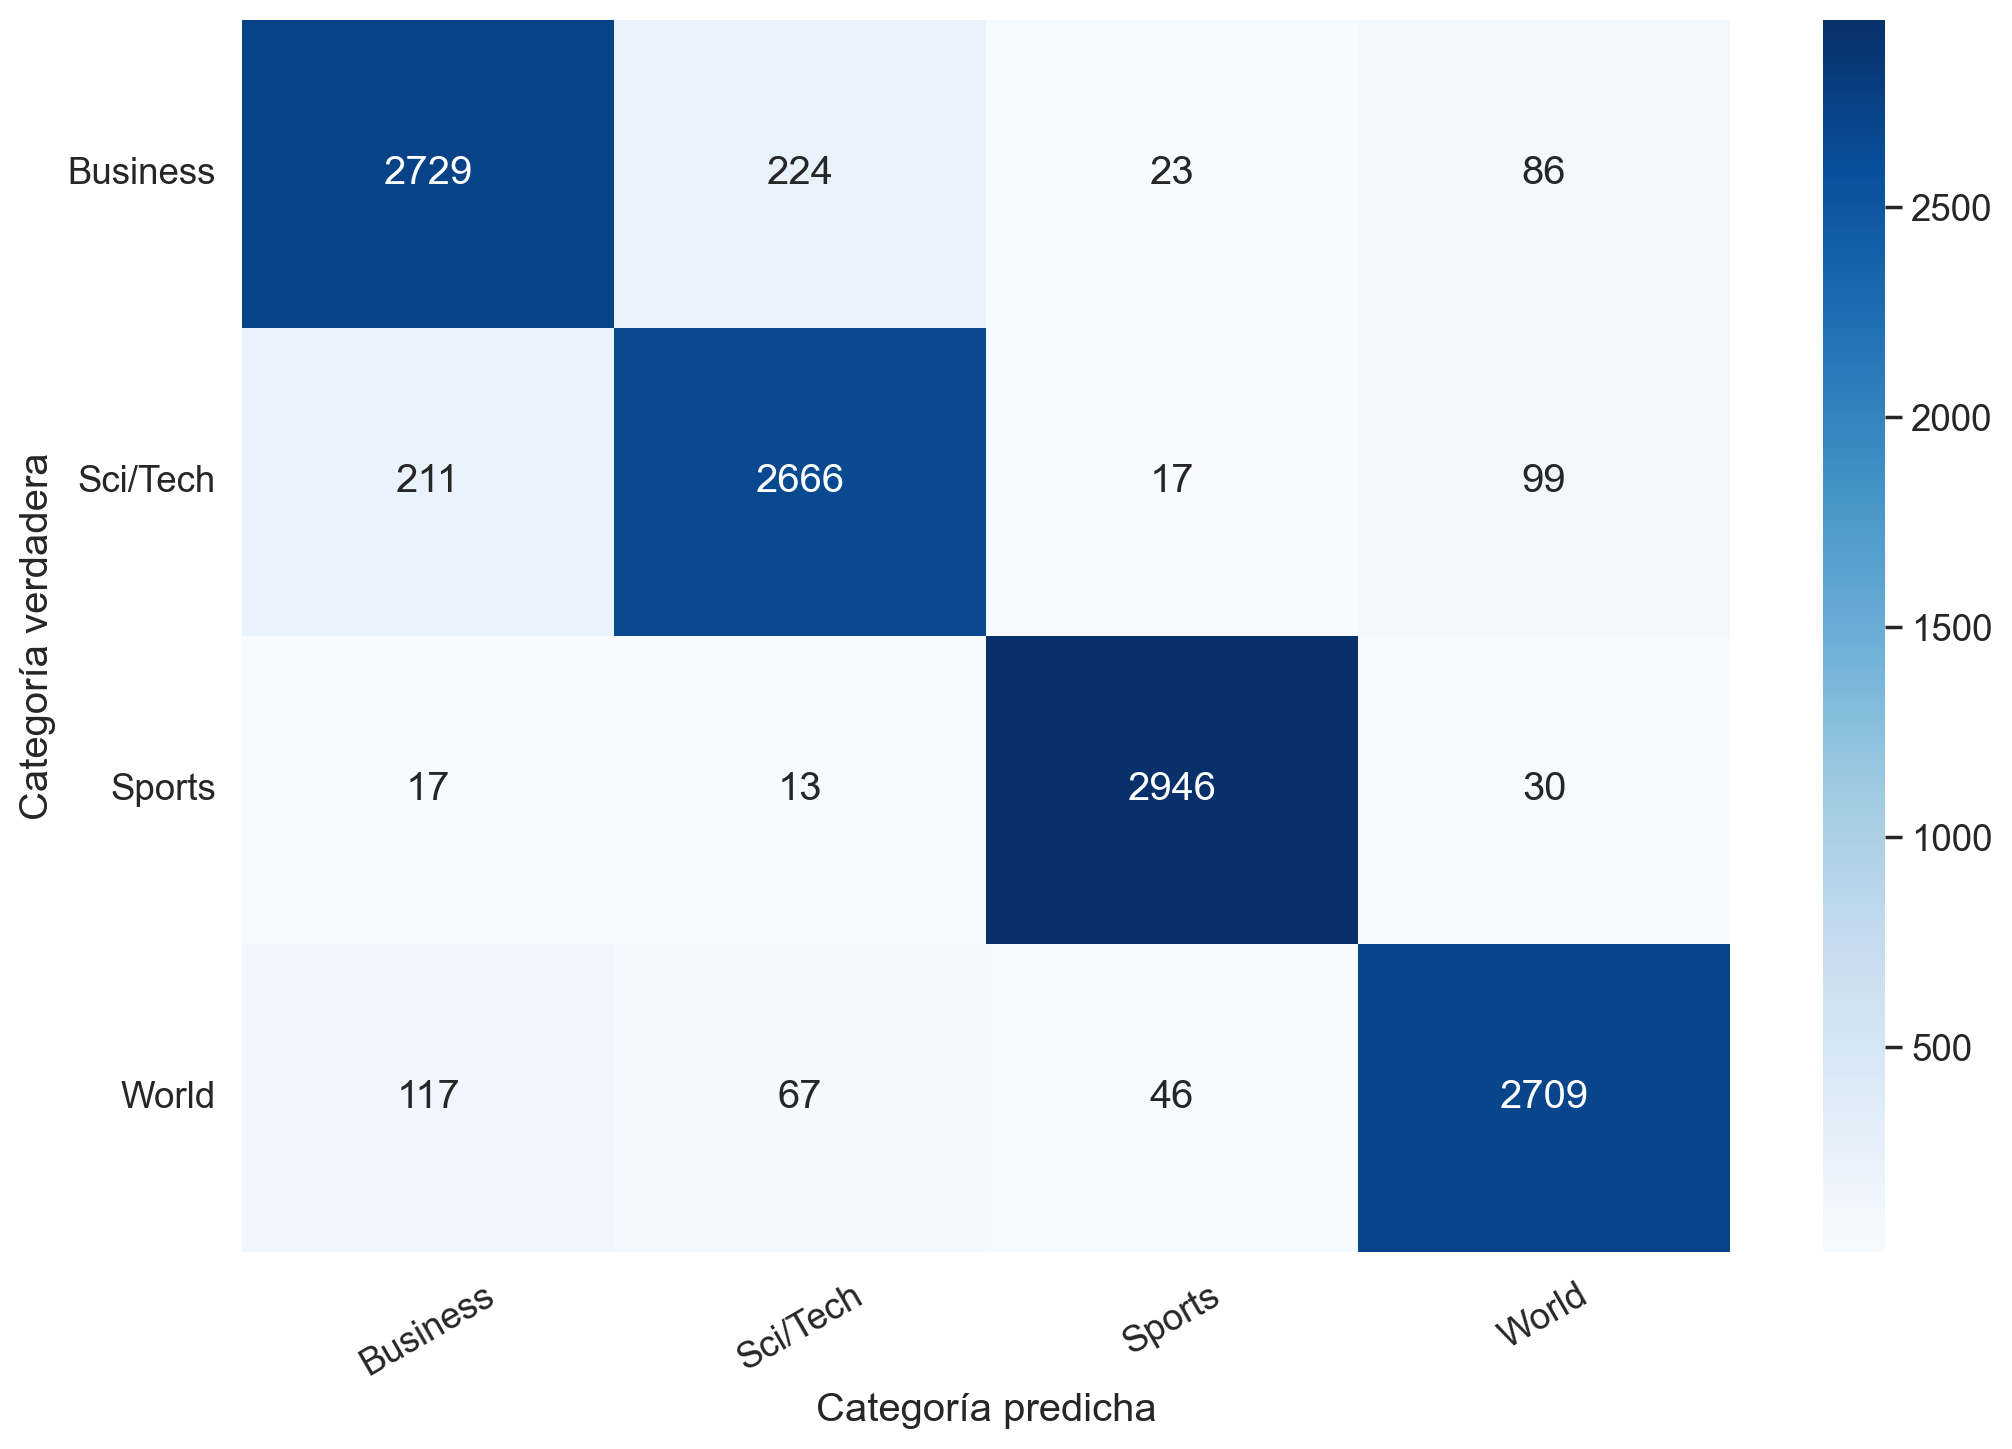

In [56]:
# def show_confusion_matrix(confusion_matrix):
#   hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
#   hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
#   hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
#   plt.ylabel('True category')
#   plt.xlabel('Predicted category');


def show_confusion_matrix(confusion_matrix):
    """
    Muestra una matriz de confusión utilizando una mapa de calor.

    Parameters
    ----------
    confusion_matrix : numpy.ndarray
        Una matriz de confusión de forma (n_classes, n_classes) donde las filas representan las categorías verdaderas y las columnas representan las categorías predichas.

    Returns
    -------
    None
    """
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    plt.yticks(rotation=0)
    plt.xticks(rotation=30)
    plt.ylabel('Categoría verdadera')
    plt.xlabel('Categoría predicha');


cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [57]:
## VER AQUI FALSOS POSITIVOS Y AJUSTE
'''
Como podemos observar, al modelo le cuesta diferenciar entre ciencia y tecnología\n
y Negocios, estas categorias agrupan la mayor concentración de falsos positivos.
'''

'\nComo podemos observar, al modelo le cuesta diferenciar entre ciencia y tecnología\n\ny Negocios, estas categorias agrupan la mayor concentración de falsos positivos.\n'

In [58]:
idx = 2

review_text = y_review_texts[idx]
true_category = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [59]:
print("\n".join(wrap(review_text)))
print()
print(f'True category: {class_names[true_category]}')

IBM signed a definitive agreement to acquire Venetica, a privately
held company based in Charlotte, North Carolina. The acquisition is
expected to close in the fourth-quarter.

True category: Sci/Tech


Ahora podemos mirar la confianza de cada clasificación de nuestro modelo:

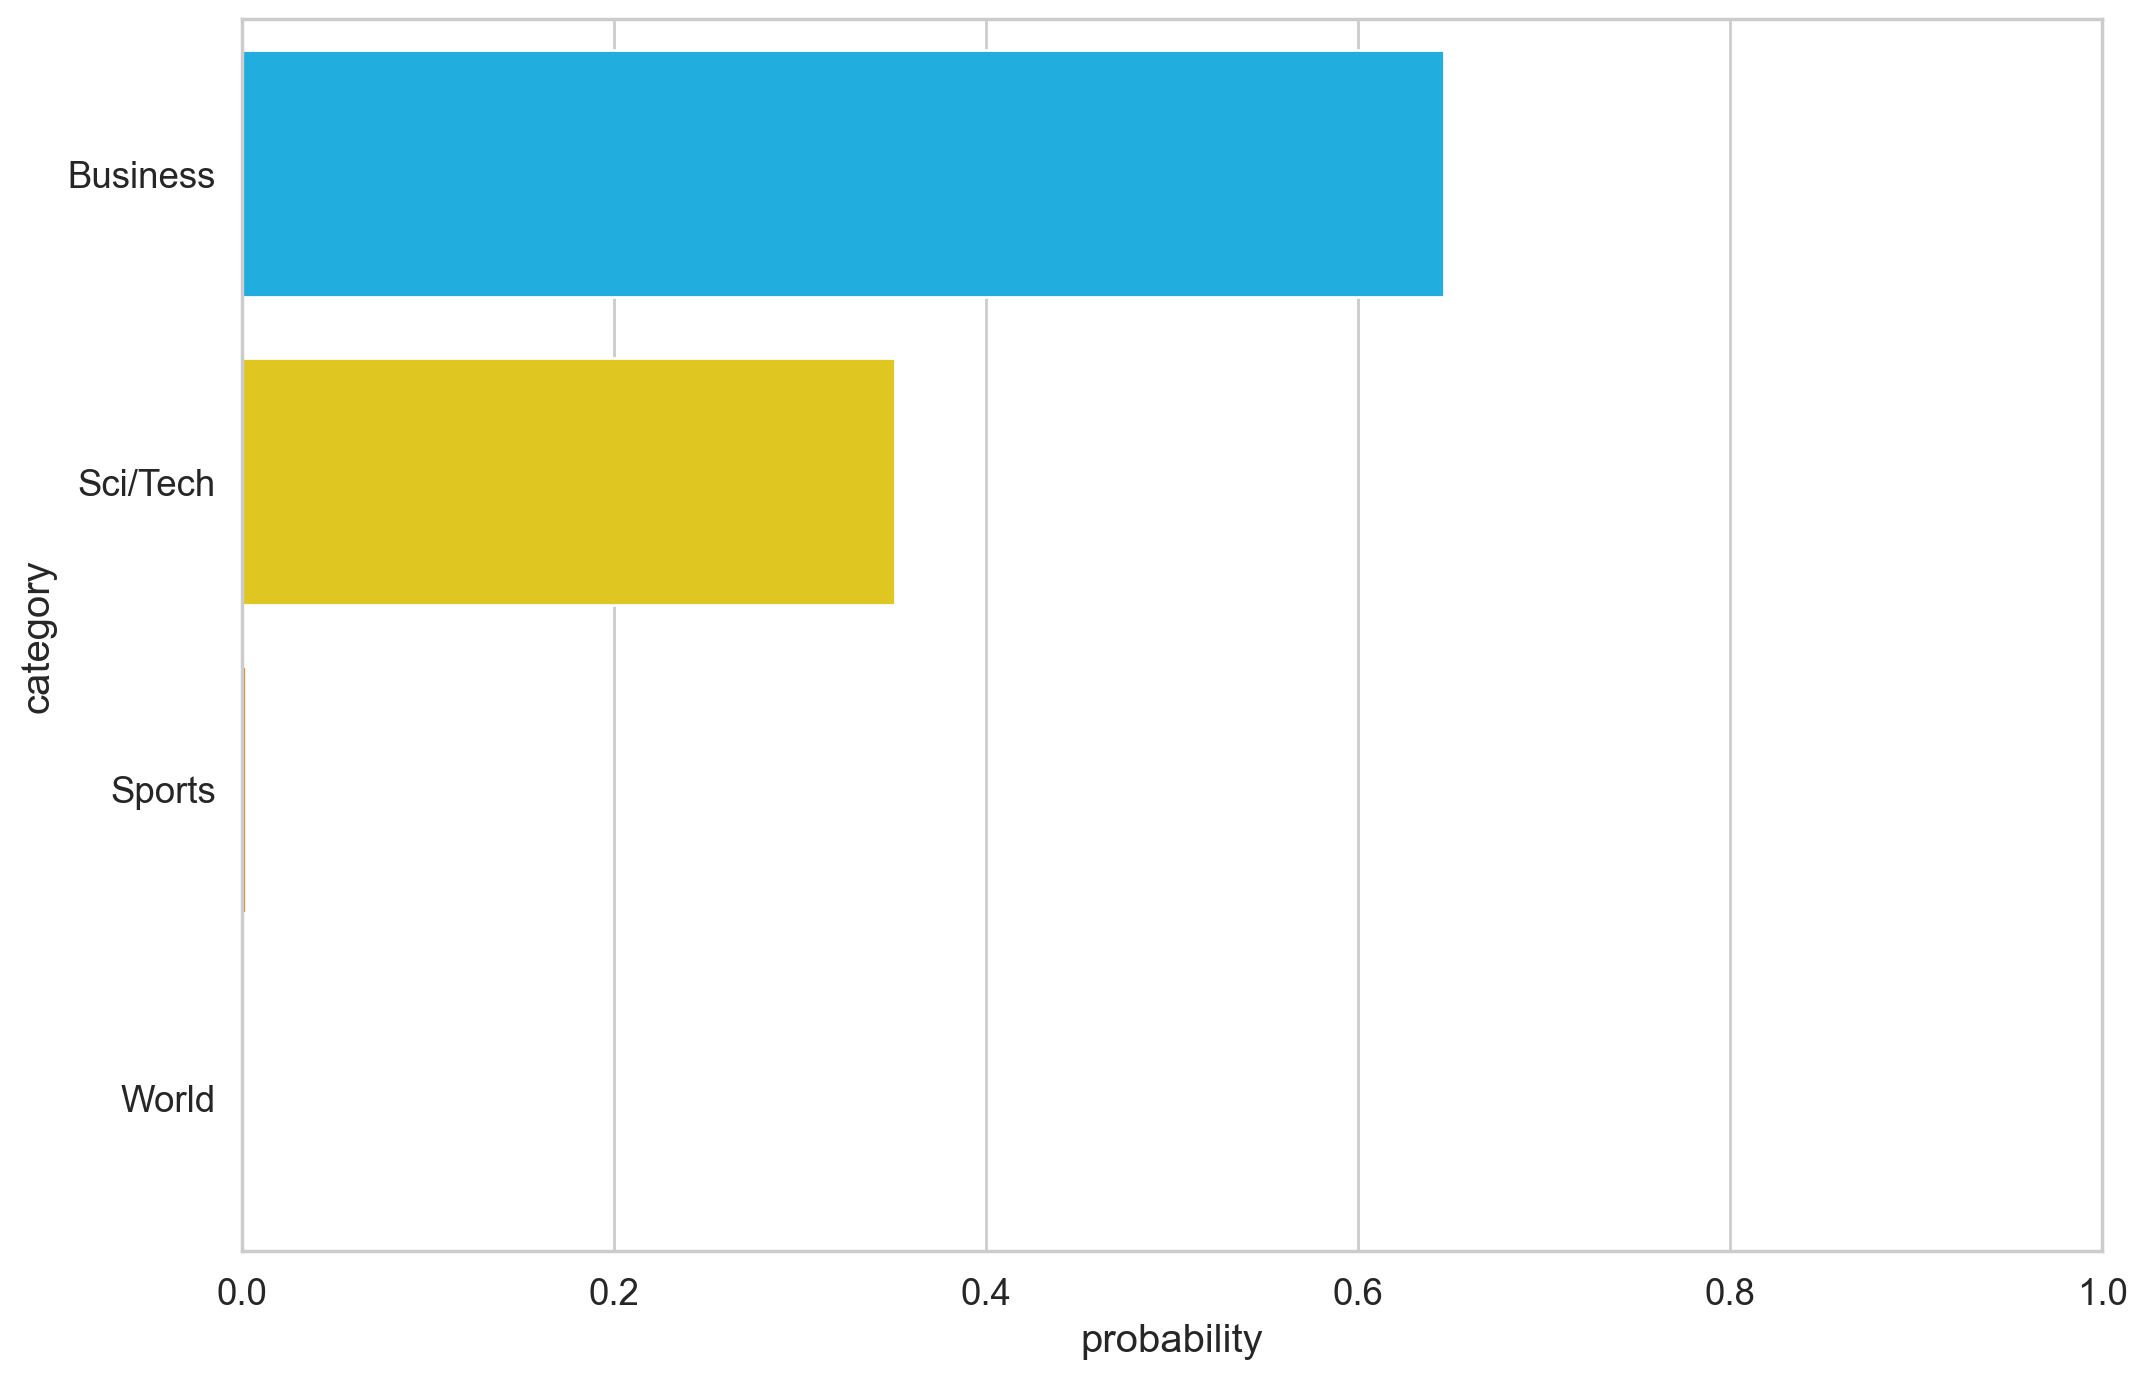

In [60]:
# VER LA CONFIANZA DE LA PREDICCIÓN DEL EJEMPLO ANTERIOR.
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('category')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [61]:
if platform.system() == 'Linux':
    from google.colab import runtime
    runtime.unassign()